In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [
    [20, 1, 0, 20, 0],
    [18, 1, 1, 33, 0],
    [11, 0, 1, 21, 1],
    [31, 0, 0, 18, 1],
    [19, 1, 1, 7, 1],
    [21, 1, 0, 10, 0],
    [44, 1, 0, 23, 1],
    [15, 1, 1, 16, 0],
    [16, 0, 1, 15, 1],
    [17, 1, 0, 6, 0]
]

In [3]:
data = np.array(data)
X = data[:, :-1]
y = data[:, -1]
print(X)
print(y)
print(len(y))

[[20  1  0 20]
 [18  1  1 33]
 [11  0  1 21]
 [31  0  0 18]
 [19  1  1  7]
 [21  1  0 10]
 [44  1  0 23]
 [15  1  1 16]
 [16  0  1 15]
 [17  1  0  6]]
[0 0 1 1 1 0 1 0 1 0]
10


In [4]:
theta_0 = 0.3
theta_1 = 0.05
theta_2 = -3
theta_3 = 2.1
theta_4 = 0.008


g = lambda x : theta_1 * x[0] + theta_2 * x[1] + theta_3 * x[2] + theta_4 * x[3] + theta_0
f = lambda x : (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))

In [5]:
for x in X:
  print(f(g(x)))

-0.9121203692077172
0.5109392346984012
0.9960923088427541
0.9636012140715537
0.3850710566999133
-0.9170257613966083
-0.3058856354111792
0.27105302652862084
0.9973893576929466
-0.947012737861736


# 3.1

In [6]:
gxs = []
for x in X:
    print(f'g({x}) = {g(x)}')
    gxs.append(g(x))

g([20  1  0 20]) = -1.54
g([18  1  1 33]) = 0.5640000000000001
g([11  0  1 21]) = 3.1180000000000003
g([31  0  0 18]) = 1.994
g([19  1  1  7]) = 0.40600000000000025
g([21  1  0 10]) = -1.5699999999999998
g([44  1  0 23]) = -0.3159999999999999
g([15  1  1 16]) = 0.2780000000000001
g([16  0  1 15]) = 3.3200000000000003
g([17  1  0  6]) = -1.8019999999999998


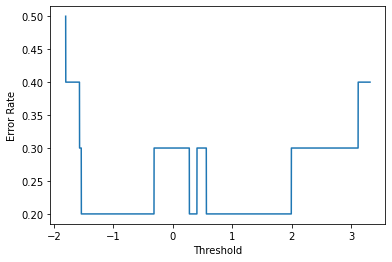

0.19999999999999996 1.993999999999582


In [7]:
errs = []
min_err = 999
min_err_thresh = None
for thresh in np.arange(min(gxs), max(gxs), 0.001):
    err = 1 - np.sum((np.asarray(gxs) >= thresh).astype(np.int8) == y) / len(y)
    errs.append(err)

    if err <= min_err:
        min_err = err
        min_err_thresh = thresh

plt.plot(np.arange(min(gxs), max(gxs), 0.001), errs)
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.show()

print(min_err, min_err_thresh)

# 3.2

In [8]:
fxs = []
for x in X:
    print(f'f({x}) = {f(g(x))}')
    fxs.append(f(g(x)))

f([20  1  0 20]) = -0.9121203692077172
f([18  1  1 33]) = 0.5109392346984012
f([11  0  1 21]) = 0.9960923088427541
f([31  0  0 18]) = 0.9636012140715537
f([19  1  1  7]) = 0.3850710566999133
f([21  1  0 10]) = -0.9170257613966083
f([44  1  0 23]) = -0.3058856354111792
f([15  1  1 16]) = 0.27105302652862084
f([16  0  1 15]) = 0.9973893576929466
f([17  1  0  6]) = -0.947012737861736


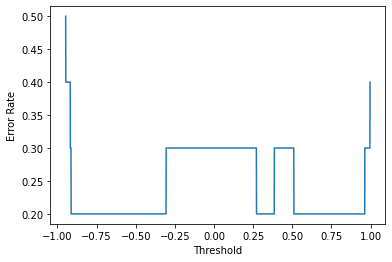

0.19999999999999996 [-0.912012737861736, -0.911012737861736, -0.910012737861736, -0.909012737861736, -0.908012737861736, -0.907012737861736, -0.906012737861736, -0.905012737861736, -0.904012737861736, -0.903012737861736, -0.902012737861736, -0.901012737861736, -0.900012737861736, -0.899012737861736, -0.898012737861736, -0.897012737861736, -0.896012737861736, -0.895012737861736, -0.894012737861736, -0.893012737861736, -0.892012737861736, -0.891012737861736, -0.890012737861736, -0.889012737861736, -0.888012737861736, -0.887012737861736, -0.886012737861736, -0.885012737861736, -0.884012737861736, -0.883012737861736, -0.882012737861736, -0.881012737861736, -0.880012737861736, -0.879012737861736, -0.878012737861736, -0.877012737861736, -0.876012737861736, -0.875012737861736, -0.8740127378617359, -0.8730127378617359, -0.8720127378617359, -0.8710127378617359, -0.8700127378617359, -0.8690127378617359, -0.8680127378617359, -0.8670127378617359, -0.8660127378617359, -0.8650127378617359, -0.864012

In [9]:
errs = []
min_err = 999
min_err_threshs = []
for thresh in np.arange(min(fxs), max(fxs), 0.001):
    err = 1 - np.sum((np.asarray(fxs) >= thresh).astype(np.int8) == y) / len(y)
    errs.append(err)

    if err <= min_err:
        min_err = err
        min_err_thresh = thresh

plt.plot(np.arange(min(fxs), max(fxs), 0.001), errs)
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.show()

for thresh in np.arange(min(fxs), max(fxs), 0.001):
    err = 1 - np.sum((np.asarray(fxs) >= thresh).astype(np.int8) == y) / len(y)
    if err == min_err:
        min_err_threshs.append(thresh)

print(min_err, min_err_threshs)

In [10]:
def compute_tp_tn_fn_fp(y_true, y_pred):
	tp = sum((y_true == 1) & (y_pred == 1))
	tn = sum((y_true == 0) & (y_pred == 0))
	fn = sum((y_true == 1) & (y_pred == 0))
	fp = sum((y_true == 0) & (y_pred == 1))
	return tp, tn, fp, fn

def report_result(min_err_thresh):
    y_pred_aft_thresh = (np.asarray(fxs) >= min_err_thresh).astype(np.int8)
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y, y_pred_aft_thresh)
    precision = tp/ float( tp + fp)
    recall = tp/ float( tp + fn)
    f1 = (2*precision*recall)/ (precision + recall)
    confusion_matrix = np.asarray([[tp, fp], [fn, tn]])
    print(f'Thresh={min_err_thresh}\t\nPrecision: {precision}\t\nRecall: {recall}\t\nf1: {f1}\t\nCM: {confusion_matrix}\n')

In [11]:
report_result(-0.912012737861736)
report_result(0.0)
report_result(0.75)



Thresh=-0.912012737861736	
Precision: 0.7142857142857143	
Recall: 1.0	
f1: 0.8333333333333333	
CM: [[5 2]
 [0 3]]

Thresh=0.0	
Precision: 0.6666666666666666	
Recall: 0.8	
f1: 0.7272727272727272	
CM: [[4 2]
 [1 3]]

Thresh=0.75	
Precision: 1.0	
Recall: 0.6	
f1: 0.7499999999999999	
CM: [[3 0]
 [2 5]]



# 3.3

Text(0, 0.5, 'True Positive Rate')

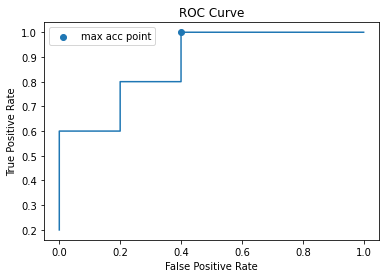

In [12]:
roc = []
accs = []
for thresh in np.arange(min(fxs), max(fxs), 0.001):
    y_pred = (np.asarray(fxs) >= thresh).astype(np.int8)
    accs.append(np.sum(y==y_pred) / len(y))
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y, y_pred)
    tpr, fpr = tp / (tp + fn), fp / (fp + tn)
    roc.append([fpr, tpr])
roc = np.asarray(roc)
max_acc_index = accs.index(max(accs))
plt.scatter(roc[max_acc_index][0], roc[max_acc_index][1], label='max acc point')
plt.legend()
plt.plot(roc[:,0],roc[:,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')